
# Project: Medical Appointments  Show/No Shows Investagation

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


The dataset that I am going to analyze is about patients and whether or not they show to their scheduled appointments. 
There are different columns that could help with finding relations between showing or not showing with certain features of the patients, like appointment date, medical conditions that a patient has, location, and gender. 

I will try to study male patients and female patients, and whether or not their is a different between their showing rates.
Also, does the awaiting time before an appointment matters in showing or not? And whether certain weekdays have different likelihoods of showing?


In [63]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [64]:
df = pd.read_csv('noshow.csv')

df.shape

(110527, 14)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [66]:
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [67]:
df.tail(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110517,5.574942e+12,5780122,F,2016-06-07T07:38:34Z,2016-06-07T00:00:00Z,19,MARIA ORTIZ,0,0,0,0,0,0,No
110518,7.263315e+13,5630375,F,2016-04-27T15:15:06Z,2016-06-07T00:00:00Z,50,MARIA ORTIZ,0,0,0,0,0,1,No
110519,6.542388e+13,5630447,F,2016-04-27T15:23:14Z,2016-06-07T00:00:00Z,22,MARIA ORTIZ,0,0,0,0,0,1,No
110520,9.969977e+14,5650534,F,2016-05-03T07:51:47Z,2016-06-07T00:00:00Z,42,MARIA ORTIZ,0,0,0,0,0,1,No
110521,3.635534e+13,5651072,F,2016-05-03T08:23:40Z,2016-06-07T00:00:00Z,53,MARIA ORTIZ,0,0,0,0,0,1,No
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [68]:
df.duplicated().sum()

0

In [69]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


After insepcting the data to check for duplication and missing values the data seems mostly clean. One thing I noticed that might need to be changed to make it easier to deal with dates is to change the data type of the dates; as they are not in datetime format. Which I believe would help with an idea that I have later on the analysis. 


Something that might need further insepction is that the age min value is -1! Thier might be some missing Age values in some of the rows. 



### Data Cleaning: Properly Assign Dates to DateTime Data Types. 
### Deal With Ages Less Than 0.
### Swap a Confusing Column Name And Its Values.

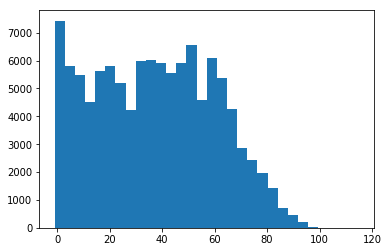

In [70]:
plt.hist(df["Age"],bins = 30);

In [71]:
df.Age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [72]:
 df[df.Age <= 0].count() ## count those with negative ages. 

PatientId         3540
AppointmentID     3540
Gender            3540
ScheduledDay      3540
AppointmentDay    3540
Age               3540
Neighbourhood     3540
Scholarship       3540
Hipertension      3540
Diabetes          3540
Alcoholism        3540
Handcap           3540
SMS_received      3540
No-show           3540
dtype: int64

Seems like there are 3540 rows with age less than or equal to 0 which is not possible. 

Since these rows account for a small percentage of the whole data I will just drop them. 

In [73]:
df.drop(df[df.Age <= 0].index, inplace=True)
df.shape

(106987, 14)

successfully dropped


In [74]:
df["No-show"].value_counts()

No     85307
Yes    21680
Name: No-show, dtype: int64

According to cloumns description, the "No" values indicates that the patient showed to the appointment. 

In [75]:
df.rename(columns={"No-show": "Show"}, inplace= True);
df.Show = np.where(df.Show == "No", 1,0)
df.Show.describe()

count    106987.000000
mean          0.797359
std           0.401969
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: Show, dtype: float64

Changed the No-show values to numeric values, because it was confusing, where 1 values means showed, and 0 means no show. 
Numeric values should be easier to deal with in the future as well. 

In [76]:
df.head()
df.Show.value_counts()

1    85307
0    21680
Name: Show, dtype: int64

Making sure the values are still the same

In [77]:


date_test = df.ScheduledDay[0]
print(date_test)

2016-04-29T18:38:08Z


The date format that's in the data frame isn't in the right type, I also would like to change its format.  

In [78]:
print(date_test[:-4])
date_test = date_test[:-4]; 

2016-04-29T18:38


As I am not sure how to exactly convert this format to datetime I will test a few things on my test date.

In [79]:
print(date_test[:-6] + " " +  date_test[-5:])
date_test = date_test[:-6] + " " +  date_test[-5:]

2016-04-29 18:38


Now that I managed to get the "date_test" into an easier format to read for me, I will convert it to datetime. 

In [80]:
date_test = pd.to_datetime(date_test) 
type(date_test)

pandas._libs.tslibs.timestamps.Timestamp

In [81]:
times = df.ScheduledDay.str[:-4]; 
times = times.str[:-6] + " " + times.str[-5:]
pd.to_datetime(times)
df.ScheduledDay = times
df.ScheduledDay = pd.to_datetime(df['ScheduledDay']);


Since all the operations i did on the test_date were general and not specific, I could apply the same idea to all the rest of the dates.
I learned how to slice the string in a whole column from this question https://stackoverflow.com/questions/36505847/substring-of-an-entire-column-in-pandas-dataframe. 

below I will do the same for the "AppointmentDay" column. 

In [82]:
times = df.AppointmentDay.str[:-4]; 
times = times.str[:-6] + " " + times.str[-5:]
pd.to_datetime(times)
df.AppointmentDay = times
df.AppointmentDay = pd.to_datetime(df['AppointmentDay']);

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106987 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         106987 non-null float64
AppointmentID     106987 non-null int64
Gender            106987 non-null object
ScheduledDay      106987 non-null datetime64[ns]
AppointmentDay    106987 non-null datetime64[ns]
Age               106987 non-null int64
Neighbourhood     106987 non-null object
Scholarship       106987 non-null int64
Hipertension      106987 non-null int64
Diabetes          106987 non-null int64
Alcoholism        106987 non-null int64
Handcap           106987 non-null int64
SMS_received      106987 non-null int64
Show              106987 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(9), object(2)
memory usage: 17.2+ MB


The dates look more readble and are in the right format.

I noticed that the appointment dates don't have the time of the day included. Unlike the schedule date which has it include, which I can use later on the analysis. 

Note: I've learned after that I could immediately change the orignal format to datetime, but I believe this format looks more readable.

<a id='eda'></a>
## Exploratory Data Analysis



### Does the time of waiting before an appointment mattters in showing or not?

In [84]:
df["time_before_appointment"] = (df.AppointmentDay - df.ScheduledDay).dt.days
df["time_before_appointment"] = df["time_before_appointment"] + 1
# I am adding 1 becuse the appointment day doesn't have the time of day included and all the times are set to 00-00:00. 
# so the value after substracting should be greater unless the ScheduledDay time was at 00-00:00, it avoids -1 days. 
# so basicly I am just taking the cieling of the result. 

First I will create a new column that calculates the time difference in days and try to study it.

In [85]:
(df.time_before_appointment<0).sum() ## check for appointment day coming before the schedule day which doesn't make sense. 

5

In [86]:
df[df["time_before_appointment"] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,time_before_appointment
27033,7.839273e+12,5679978,M,2016-05-10 10:51:00,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,0,-1
55226,7.896294e+12,5715660,F,2016-05-18 14:50:00,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,0,-1
64175,2.425226e+13,5664962,F,2016-05-05 13:43:00,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,0,-1
71533,9.982316e+14,5686628,F,2016-05-11 13:49:00,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,0,-6
72362,3.787482e+12,5655637,M,2016-05-04 06:50:00,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,0,-1


I will just drop these 5 rows; as having an appointment day before schedule day doesn't make sense. 

In [87]:
df.drop(df[df.time_before_appointment < 0].index, inplace=True)
df.shape

(106982, 15)

In [88]:
df.tail(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,time_before_appointment
110522,2.572134e+12,5651768,F,2016-05-03 09:15:00,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,1,35
110523,3.596266e+12,5650093,F,2016-05-03 07:27:00,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,1,35
110524,1.557663e+13,5630692,F,2016-04-27 16:03:00,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,1,41
110525,9.213493e+13,5630323,F,2016-04-27 15:09:00,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,1,41
110526,3.775115e+14,5629448,F,2016-04-27 13:30:00,2016-06-07,54,MARIA ORTIZ,0,0,0,0,0,1,1,41


Text(0,0.5,'Count')

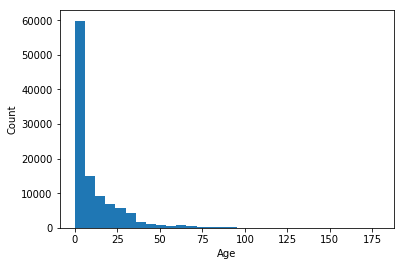

In [116]:
plt.hist(df["time_before_appointment"],bins  = 30  );
plt.xlabel("Age")
plt.ylabel("Count")

Seems like it's a right skewd histogram, with most appointments being in the same day of scheduling. 

In [90]:
df.Show.mean()

0.79739582359649286

~80% of people show in general

In [91]:
df.groupby(['Show']).mean()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,time_before_appointment
Show,,,,,,,,,,
0,1.467176e+14,5.652565e+06,35.329596,0.118616,0.174025,0.065975,0.031234,0.020807,0.441430,15.793403
1,1.474210e+14,5.681245e+06,39.075187,0.096569,0.211343,0.076348,0.031451,0.023503,0.293258,8.737794


Seems like the mean values for people who showed(1) vs the people who didn't know show(0) is around the same for most variables, expect for "Time before appointment" column and "SMS_received" column. 

Where the mean days before appointment for people who didn't show to their appointment is higher than the mean time for people who did show. An average 15.7 days of waiting for those who  didn't show vs an average of 8.7 days for those who showed. 

Seems like people who recieve SMS by average show less than those who don't.

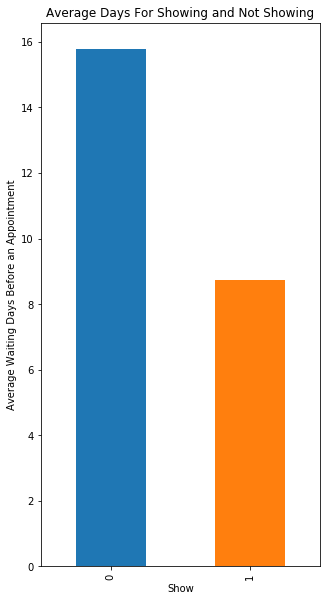

In [92]:
plt.figure(figsize=(5,10))
df.groupby("Show")["time_before_appointment"].mean().plot(kind ='bar');
plt.title("Average Days For Showing and Not Showing")
plt.ylabel("Average Waiting Days Before an Appointment");


In [93]:
df.groupby("Show").describe().time_before_appointment

,count,mean,std,min,25%,50%,75%,max
Show,,,,,,,,
0,21675.0,15.793403,16.615534,0.0,4.0,11.0,23.0,179.0
1,85307.0,8.737794,14.558336,0.0,0.0,2.0,12.0,179.0


In [94]:
zeroDays = df[df["time_before_appointment"] == 0]; 

zeroDays.shape

(37154, 15)

I believe that it's worth studying appointments at the same day of scheduling day(time before appointment = 0), since they make the majority of cases with 37154 rows.

In [95]:
noShowCount = df.Show.value_counts()[0]; 
allPeopleCount = df.shape[0]; 

noShowCount/allPeopleCount

0.20260417640350714

In [96]:
noShowCountZeroDays = zeroDays.Show.value_counts()[0]
allPeopleZeroDaysCount = zeroDays.shape[0]

noShowCountZeroDays/allPeopleZeroDaysCount

0.046859019217311733

That is a huge difference! with only 4% of people who scheduled on the same day didn't show.
as opposed to 20% in general.

In [97]:
len(df.time_before_appointment.unique())

129

129 unique waiting days. I will try to plot the days with Showing percentage for each day below.

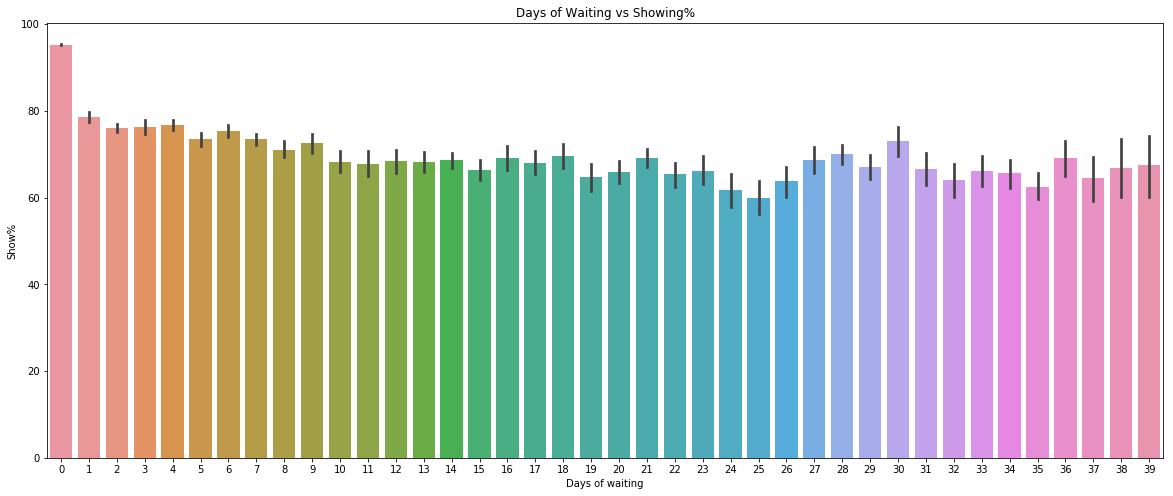

In [98]:
plt.figure(figsize=(20,8));
fig = sns.barplot(x= df[df["time_before_appointment"]<40].time_before_appointment ,y = df["Show"]*100)
# I chose days that are less than 40 since the more days of waiting the less of a reliable sample size we have,
# also it makes the plot more readble.
plt.title('Days of Waiting vs Showing%')
plt.xlabel('Days of waiting')
plt.ylabel("Show%");


From the graph we see that there seem to be a correlation between days of waiting and the percentage of people showing to their appointments. Where less people in genral are showing with more days of waiting. 

with 95% of people showing on the same day of scheduling.   

### Do males and females have different statistics in showing or not showing? 

In [99]:
df.Gender.unique()

array(['F', 'M'], dtype=object)

In [100]:
df_males = df.query('Gender == "M"');
df_females = df.query('Gender == "F"')



male_perc = round(df_males.shape[0]*100/df.shape[0]); 
female_perc = round(df_females.shape[0]*100/df.shape[0]);
print("Male% = {}% + Female% = {}%".format(male_perc,female_perc))

Male% = 34% + Female% = 66%


Most patients are females (66%).

In [101]:
df_males.mean().Show

0.79919711395014514

In [102]:
df_females.mean().Show

0.79644869143549879

Looks like Women and Men in general Show 80% of the times with no clear difference between the two genders. 

In [103]:
df_males.describe().Age

count    36867.000000
mean        35.401118
std         23.825181
min          1.000000
25%         13.000000
50%         35.000000
75%         55.000000
max        100.000000
Name: Age, dtype: float64

The mean age for males is ~35.

In [104]:
df_females.describe().Age

count    70115.000000
mean        39.849148
std         21.559902
min          1.000000
25%         22.000000
50%         39.000000
75%         56.000000
max        115.000000
Name: Age, dtype: float64

While the mean age for females is ~40. 

Something to note is that the first quartile for males is 13, while female's first quartile is 22. 


Text(0.5,0,'Age')

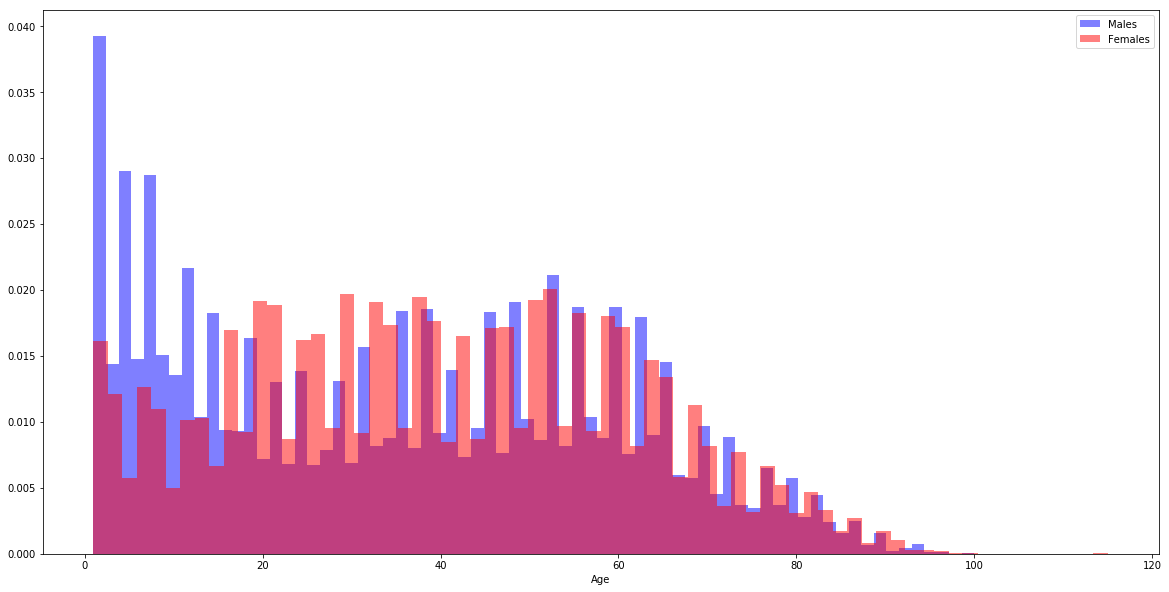

In [105]:

plt.figure(figsize=(20,10))
plt.hist(df_males.Age, color='b', label='Males',alpha = 0.5,bins=70,density=True);
plt.hist(df_females.Age,color='r',label="Females",alpha = 0.5,bins = 70,density=True,);
plt.legend();
plt.xlabel("Age")


The distribuation of Males And Females is not similar to one another. Male kids account for a bigger percentage than that of female kids, but female who are aged above 20 seem to account for a bigger percentage. 

Also we saw before that the mean age for females is 40, while males averages was 35, so that makes sense.

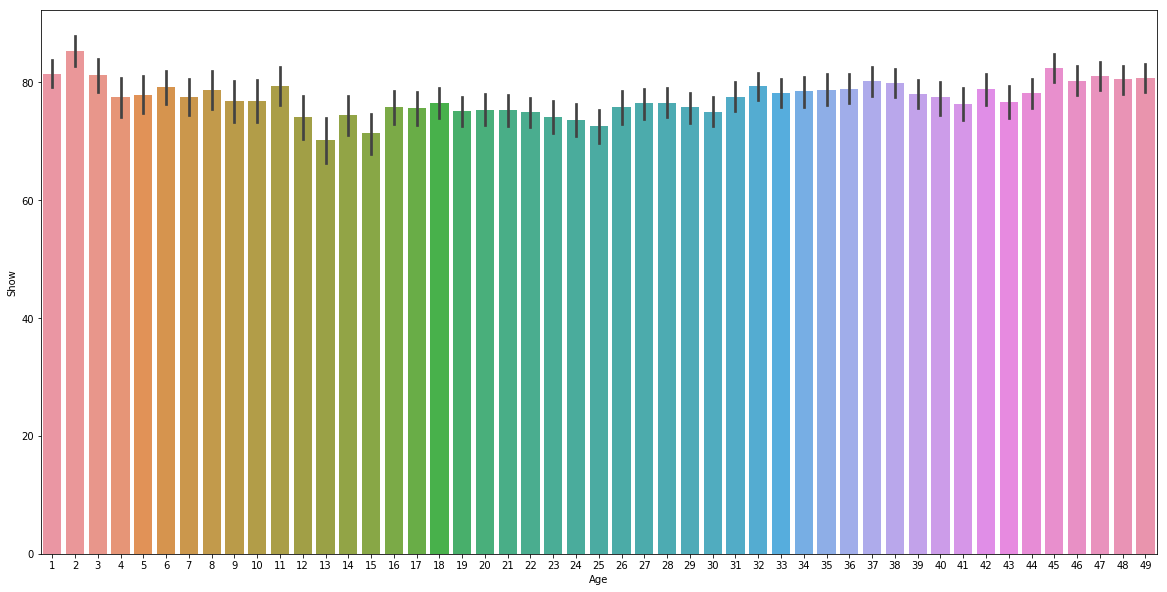

In [106]:
plt.figure(figsize=(20,10))
sns.barplot(x = df_females[df_females["Age"]<50].Age,y=df_females.Show*100);


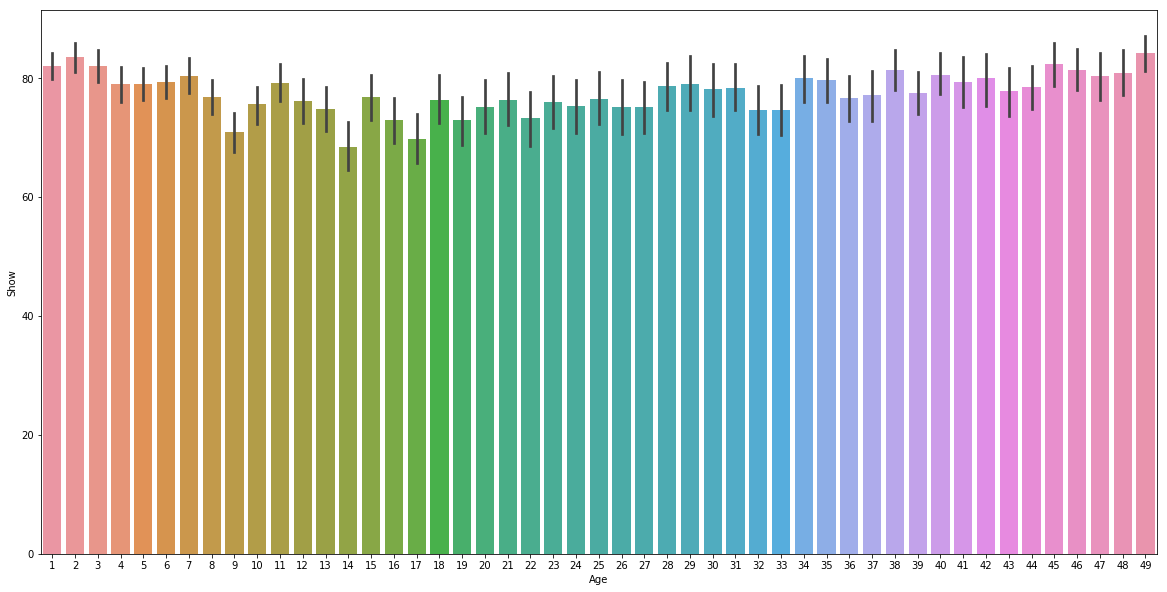

In [107]:
plt.figure(figsize=(20,10));
sns.barplot(x = df_males[df_males["Age"]<50].Age,y=df_males.Show*100);


The distrubations of ages percentage of showing for males and femles seems similar.

### Does the exact weekday of the appointment change anything? 

In [108]:
df["Weekday"] = df["AppointmentDay"].dt.weekday
df.Weekday.value_counts()

2    25089
1    24829
0    21902
4    18465
3    16658
5       39
Name: Weekday, dtype: int64

Seems like there are no appointments at sunday, and only 39 on saturday.

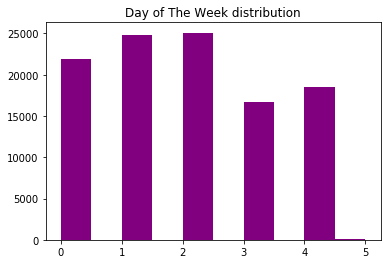

In [109]:
plt.hist(df.Weekday,color='purple')
plt.title("Day of The Week distribution");

Monday Tuesday and Wednesday account for most of the appointments. 

In [110]:
df_saturday = df[df["Weekday"] == 5]
df_saturday.AppointmentDay.value_counts()

2016-05-14    39
Name: AppointmentDay, dtype: int64

All the appointment that were at saturday were on a single day(2016-05-14). Maybe there was some special reason for that.



-




Lets see now if there is any correlation between certian day of the weeks with showing and not showing

In [111]:
df.groupby(["Weekday"]).mean().Show

Weekday
0    0.793900
1    0.797737
2    0.802822
3    0.805319
4    0.786623
5    0.769231
Name: Show, dtype: float64

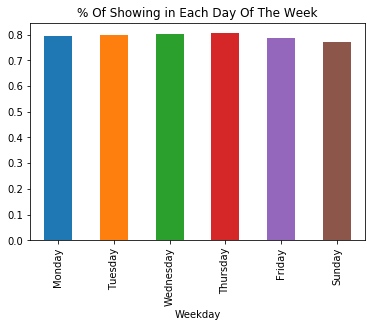

In [112]:
ax= df.groupby(["Weekday"]).mean().Show.plot(kind='bar')
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Sunday']
ax.set_xticklabels(days)
plt.title("% Of Showing in Each Day Of The Week");

Seems like there is no clear correlation between any weekday with % of showing, but appointments in Friday have a %of showing that is slightley less than the rest with 78.6%. 

Saturday appointments have lower show percentages than the rest with 77%, but the sample size for that day is insignificant with only 39 cases.  

<a id='conclusions'></a>
## Conclusions



That data that was persented to me was mostly clean with no intensive need for cleaning, no duplicate rows or null values.
Some ages were less than 0 so I removed the rows associated with them. I could've maybe used the mean age or the mode age to replace the negative values.

In my first research question: Does the time of waiting before an appointment mattters in showing or not? I've came up with good results, showing that people who have less waiting time before an appointment show more in general with people having an appointment in the same day of scheduling showing 95% of the times.
People who show have an average waiting days of 8.7, as opposed to those who don't with an average waiting days of 15.8
Of course this is not a definite result, but there seem to be a correlation between the two variables (Days before an appointment  and Showing percentage).

The second research question: Do males and females have different statistics in showing or not showing? I was interested in seeing if there is a clear difference between the two genders in this context. Turns out males and females show to appointments around the same percentages. with ~80% for both genders which is also the general show percentage.
Females account for 66% of all the appointments while males account for 34%. This could potentially mean that females care more about their health than males. 
Also male kids account for a bigger percentage of than that of female kids, with the mean age for males is ~35, while that of females is ~40. 

My third research question: Does the exact weekday of the appointment change anything? 
I wanted to look if there was any correlation betwween a weekday/s with % of showing to an appointment.
I found out there were no appointments on sunday, and only 39 on saturday with all of them being on the same date. 
Most appointments are on Monaday, Tuesday, and Wedensday and less appointments for Thursday and Friday. 

Percentages of showing in  different weekdays seems to be around the average showing % in general(~80%), Appointments on Friday have 78.6% showing rate, which is ~1.3% less than the showing rate in general. While appointments on Saturday have ~77% showing rates less than than the general showing rate by ~3%, but this isn't an exact implication of anything since the sample size for appointments on Saturday is too low(39 cases).

Finally I believe that there are more things that could be analyzed in the data that I didn't go through. For example he locations of the appointments could be studied for correlations with showing rates. Also using the id of patients to analyze different patients showing rate. Something that I did analyze briefly is whether different conditions have different showing rates or not, for example people with hipertension could have different rates of showing than other conditions, that is something I could've analyzed thoroughly for different conditions to possibly get different results. In the Females vs Males question I also could've analyzed different age groups to see if there is any differences as well.  

In [113]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0